### monte carlo 시뮬레이션 모듈

In [77]:
import yfinance as yf
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

class StockSimulator:
    def __init__(self, ticker,startD = None, endD = None, months = 12, num_simulations=100, T=60):
        self.ticker = ticker
        self.months = months
        self.num_simulations = num_simulations
        self.T = T
        self.today = date.today()
        if startD is None:
            self.startD = self.today - relativedelta(months=self.months)
        else:
            self.startD = startD


        self.stock_data = None
        self.mu = None
        self.sigma = None
        self.last_price = None
        self.price_df = None
        self.last_price_list = None

        self._set_korean_font()
        self.load_data()
        self._calculate_stats()
        self.run_simulation()

    def _set_korean_font(self):
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = fm.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
        
    def _calculate_stats(self):
        returns = self.stock_data['Close'].pct_change().dropna()
        self.mu = returns.mean()
        self.sigma = returns.std()

    def load_data(self, startD = None, endD = None, months = None):
        if startD is None:
            startD = self.today - relativedelta(months=self.months)
        if endD is None:
            endD = self.today
        if months is None:
            months = self.months

        self.stock_data = yf.download(self.ticker, startD, endD)
        self.last_price = self.stock_data['Close'].iloc[-1]
        
        self._calculate_stats()

    def run_simulation(self, num_simulations=None, T=None):
        if num_simulations is None:
            num_simulations = self.num_simulations
        if T is None:
            T = self.T

        df = pd.DataFrame()
        last_price_list = []

        for _ in range(self.num_simulations):
            count = 0
            price_list = []
            price = self.last_price * (1 + np.random.normal(0, self.sigma))
            price_list.append(int(price.values[0]))

            for _ in range(self.T):
                price = price_list[_] * (1 + np.random.normal(0, self.sigma))
                price_int = int(price[0])
                price_list.append(price_int)

            df[len(df.columns)] = price_list
            last_price_list.append(price_list[-1])

        self.price_df = df
        self.last_price_list = last_price_list

    def plot_simulation(self):
        plt.figure(figsize=(12, 8))
        figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
        figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

        # 경로 그래프
        figL.plot(self.price_df.iloc[:, :100], alpha=0.2)
        figL.set_title(f'{self.ticker} Monte Carlo Simulation\nStart Price: {round(self.last_price, 2)}', fontsize=14)
        figL.set_xlabel(f'Day from {self.today.strftime("%Y/%m/%d")}', fontsize=12)
        figL.set_ylabel('Price', fontsize=12)

        # 히스토그램
        figR.hist(self.last_price_list, bins=20)
        figR.axvline(np.percentile(self.last_price_list, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
        figR.axvline(np.percentile(self.last_price_list, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
        mean_value = np.mean(self.last_price_list)
        figR.set_title(f'Histogram mean: {round(mean_value, 2)}', fontsize=14)
        figR.set_xlabel('Price', fontsize=12)
        figR.set_ylabel('Frequency', fontsize=12)
        figR.legend()

        plt.tight_layout()
        plt.show()

    def print_summary(self):
        print(f"📈 종목: {self.ticker}")
        print(f"📅 분석 기간: 최근 {self.months}개월")
        print(f"💰 시작 가격: {round(self.last_price, 2)}")
        print(f"📊 평균 수익률 (mu): {round(self.mu, 6)}")
        print(f"📊 변동성 (sigma): {round(self.sigma, 6)}")
        print(f"🎯 마지막 날 가격 평균: {round(np.mean(self.last_price_list), 2)}")
        print(f"🎯 표준편차: {round(np.std(self.last_price_list), 2)}")

In [ ]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [ ]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [ ]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [ ]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [ ]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [78]:
ticker = '005930.KS'  # 예: 삼성전자

simulator = StockSimulator(ticker)

[*********************100%***********************]  1 of 1 completed


In [79]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [ ]:
simulator.months = 25

simulator.print_summary()


📈 종목: 005930.KS
📅 분석 기간: 최근 25개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000938
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.021284
dtype: float64
🎯 마지막 날 가격 평균: 61023.68
🎯 표준편차: 8971.25


In [58]:
simulator.months = 6
simulator.print_summary()

📈 종목: 005930.KS
📅 분석 기간: 최근 6개월
💰 시작 가격: Ticker
005930.KS    60800.0
Name: 2025-06-27 00:00:00, dtype: float64
📊 평균 수익률 (mu): Ticker
005930.KS   -0.000476
dtype: float64
📊 변동성 (sigma): Ticker
005930.KS    0.019862
dtype: float64
🎯 마지막 날 가격 평균: 60418.2
🎯 표준편차: 10219.15


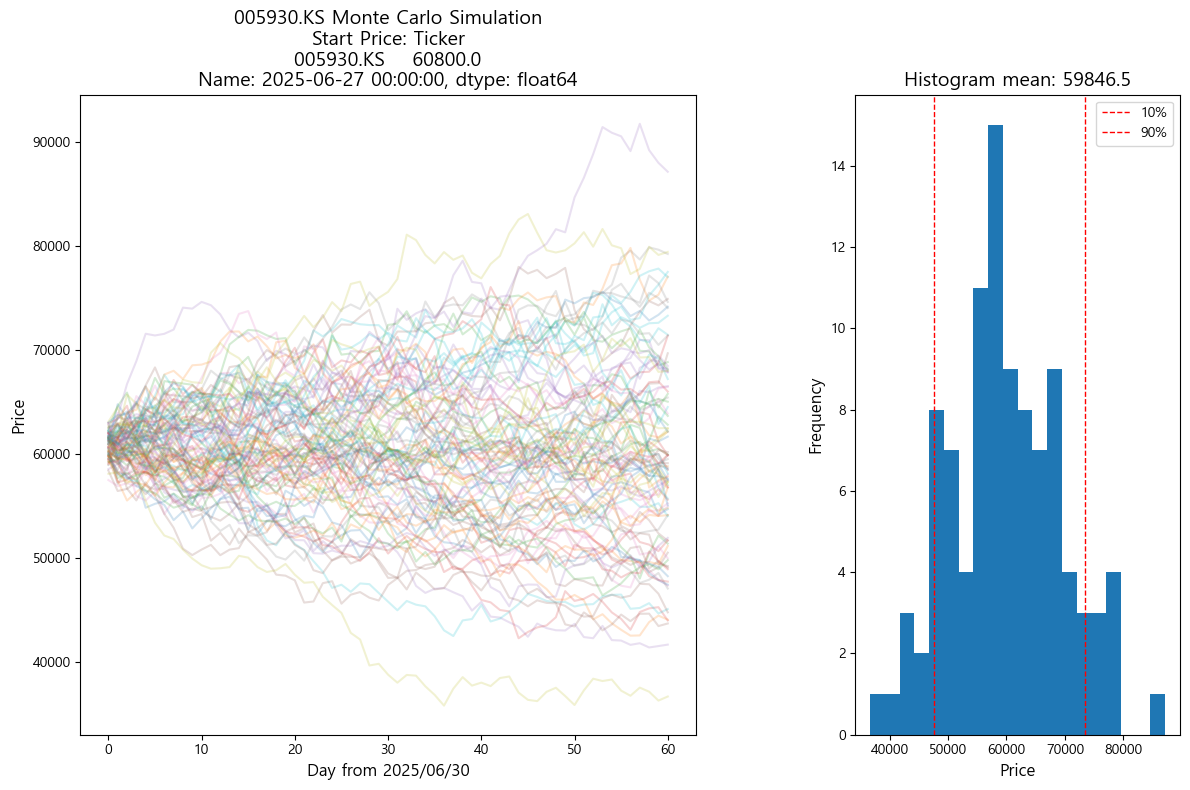

In [38]:
simulator.plot_simulation()

[*********************100%***********************]  1 of 1 completed


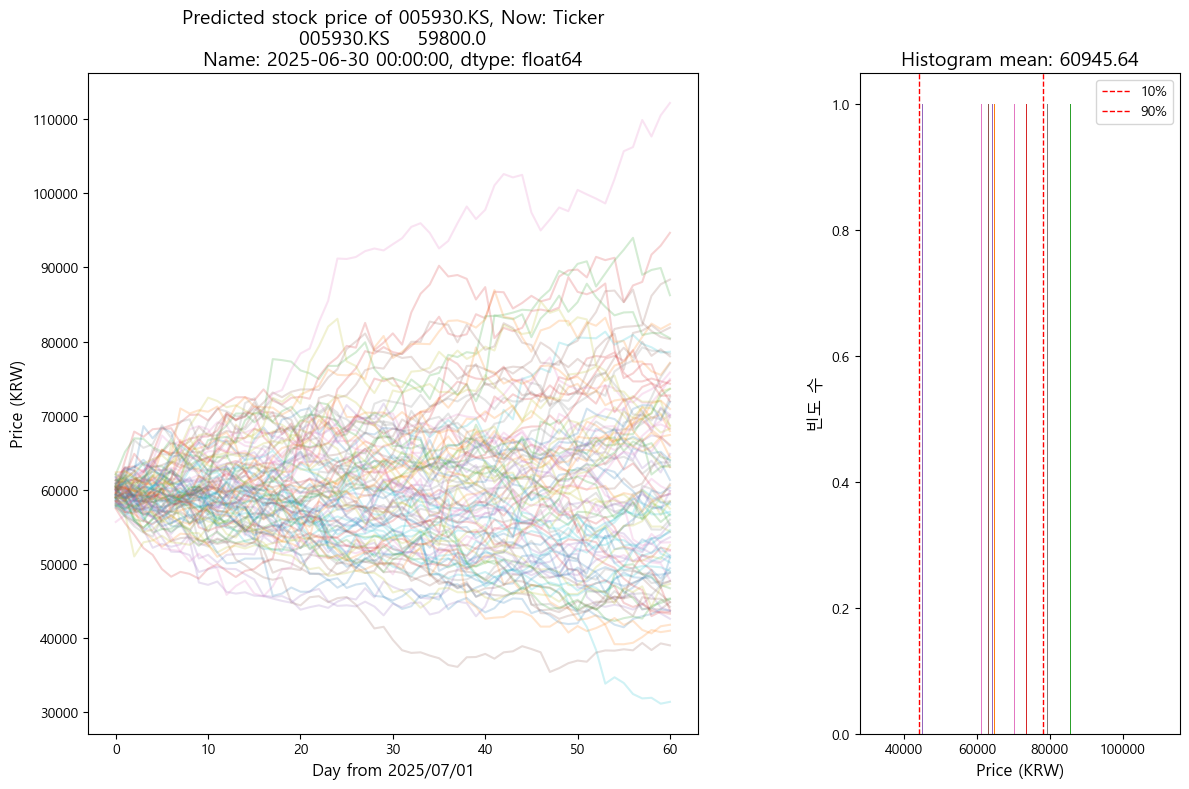


[📉 포아송 이벤트 발생 시 주가 하락률 분석]
- 이벤트 발생 횟수: 9
- 평균 수익률: 1.24%
- 최대 하락률: -8.44%


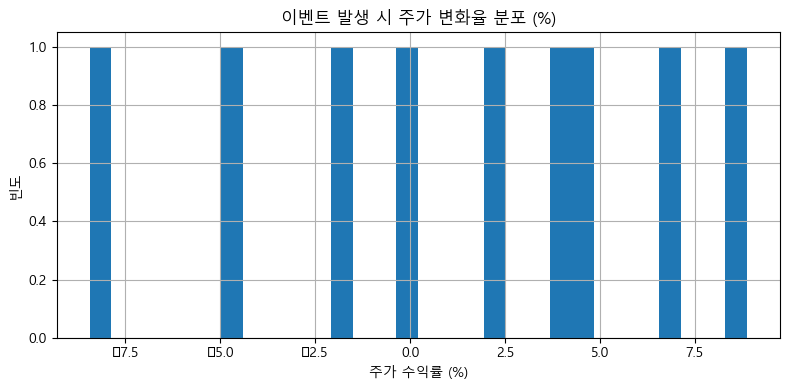

In [2]:
import yfinance as yf
import pandas as pd
from datetime import date
from dateutil.relativedelta import relativedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

# ✅ 한글 폰트 설정
def set_korean_font():
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = fm.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

# ✅ 주가 데이터 불러오기
def load_stock_data(ticker, months=18):
    today = date.today()
    startD = today - relativedelta(months=months)
    endD = today
    return yf.download(ticker, startD, endD)

# ✅ 수익률 평균과 표준편차 계산
def calc_return_stats(stock_data):
    returns = stock_data['Close'].pct_change().dropna()
    mu = returns.mean()
    sigma = returns.std()
    return mu, sigma

# ✅ 몬테카를로 시뮬레이션
def run_simulations(last_price, daily_vol, num_simulations=100, T=60, lambda_event=0.1, jump_vol=0.05):
    df = pd.DataFrame()
    last_price_list = []

    for _ in range(num_simulations):
        count = 0
        price_list = []
        price = last_price * (1 + np.random.normal(0, daily_vol))
        price_list.append(price)

        for _ in range(T):

            event = np.random.poisson(lambda_event)
            if event == 1:
                # 포아송 점프 추가
                jump_return = np.random.normal(0, jump_vol) # 점프의 평균과 표준편차 구해야 함.
                price = price * (1 + jump_return)
            else:
                # 기본 가격 변동
                price = price_list[count] * (1 + np.random.normal(0, daily_vol))

            price_list.append(price)
            count += 1

        df[len(df.columns)] = price_list
        last_price_list.append(price_list[-1])

    return df, last_price_list

# ✅ 포아송 이벤트 발생 시 수익률 시뮬레이션
def simulate_poisson_event_returns(last_price_list, lambda_event=0.1, daily_vol=0.05):
    event_returns = []
    event_count = 0

    for price in last_price_list:
        event = np.random.poisson(lambda_event)
        if event == 1:
            event_count += 1
            simulated_return = np.random.normal(loc=0, scale=daily_vol)
            event_returns.append(simulated_return)

    return event_count, event_returns

# ✅ 메인 함수 (종목코드 ticker를 인자로 받음)
def main(ticker):
    set_korean_font()
    stock_ticker = ticker
    stock_name = f'{ticker}'  # 종목명은 코드 그대로 사용

    stock_data = load_stock_data(stock_ticker)
    mu, sigma = calc_return_stats(stock_data)
    last_price = stock_data['Close'].iloc[-1]

    # 시뮬레이션 실행
    price_df, last_price_list = run_simulations(last_price, sigma)

    # 시각화 준비
    today = date.today()
    plt.figure(figsize=(12, 8))
    figL = plt.subplot2grid((1, 12), (0, 0), colspan=7)
    figR = plt.subplot2grid((1, 12), (0, 8), colspan=4)

    # 1) 주가 시뮬레이션 경로
    figL.plot(price_df.iloc[:, :100], alpha=0.2)
    figL.set_title(f'Predicted stock price of {stock_name}, Now: {round(last_price, 2)}', fontsize=14)
    figL.set_xlabel(f'Day from {today.strftime("%Y/%m/%d")}', fontsize=12)
    figL.set_ylabel('Price (KRW)', fontsize=12)

    # 2) 마지막 가격 히스토그램
    tem = [price for price in last_price_list]
    figR.hist(tem, bins=20)
    figR.axvline(np.percentile(tem, 10), color='r', linestyle='dashed', linewidth=1, label='10%')
    figR.axvline(np.percentile(tem, 90), color='r', linestyle='dashed', linewidth=1, label='90%')
    str_mean = str(round(np.mean(tem), 2))
    figR.set_title('Histogram mean: ' + str_mean, fontsize=14)
    figR.set_xlabel('Price (KRW)', fontsize=12)
    figR.set_ylabel('빈도 수', fontsize=12)
    figR.legend()
    plt.tight_layout()
    plt.show()

    # ✅ 포아송 이벤트 발생 시 하락률 시뮬레이션
    event_count, event_returns = simulate_poisson_event_returns(tem)

    print("\n[📉 포아송 이벤트 발생 시 주가 하락률 분석]")
    print(f"- 이벤트 발생 횟수: {event_count}")
    if event_count > 0:
        print(f"- 평균 수익률: {np.mean(event_returns) * 100:.2f}%")
        print(f"- 최대 하락률: {min(event_returns) * 100:.2f}%")

        plt.figure(figsize=(8, 4))
        plt.hist(np.array(event_returns) * 100, bins=30)
        plt.title("이벤트 발생 시 주가 변화율 분포 (%)")
        plt.xlabel("주가 수익률 (%)")
        plt.ylabel("빈도")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("- 이벤트가 발생하지 않았습니다.")

# ✅ 실행
if __name__ == "__main__":
    main('005930.KS')  # ← 여기만 바꾸면 종목코드 변경 가능